In [1]:
# Imports

import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# YFinance API Pull 

ticker = 'FB'

now = dt.datetime.now()
startyear = 2018
startmonth = 1 
startday = 2
start = dt.datetime(startyear, startmonth, startday)

df = pdr.get_data_yahoo(ticker, start, now)

df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-21,274.670013,267.790009,272.980011,272.790009,16553700,272.790009
2020-12-22,271.500000,264.630005,271.500000,267.089996,17312900,267.089996
2020-12-23,272.170013,266.230011,266.890015,268.109985,14329000,268.109985
2020-12-24,270.399994,266.200012,268.880005,267.399994,6702000,267.399994
2020-12-28,273.049988,265.700012,268.739990,272.595001,8327437,272.595001


# Relative Strength Index

In [3]:
# 14_Day RSI
df['Up Move'] = np.nan
df['Down Move'] = np.nan
df['Average Up'] = np.nan
df['Average Down'] = np.nan
# Relative Strength
df['RS'] = np.nan
# Relative Strength Index
df['RSI'] = np.nan

#Calculate Up Move & Down Move
for x in range(1, len(df)):
    df['Up Move'][x] = 0
    df['Down Move'][x] = 0
    
    if df['Adj Close'][x] > df['Adj Close'][x-1]:
        df['Up Move'][x] = df['Adj Close'][x] - df['Adj Close'][x-1]
        
    if df['Adj Close'][x] < df['Adj Close'][x-1]:
        df['Down Move'][x] = abs(df['Adj Close'][x] - df['Adj Close'][x-1])  
        
#Calculate initial Average Up & Down, RS and RSI
df['Average Up'][14] = df['Up Move'][1:15].mean()
df['Average Down'][14] = df['Down Move'][1:15].mean()
df['RS'][14] = df['Average Up'][14] / df['Average Down'][14]
df['RSI'][14] = 100 - (100/(1+df['RS'][14]))

#Calculate rest of Average Up, Average Down, RS, RSI
for x in range(15, len(df)):
    df['Average Up'][x] = (df['Average Up'][x-1]*13+df['Up Move'][x])/14
    df['Average Down'][x] = (df['Average Down'][x-1]*13+df['Down Move'][x])/14
    df['RS'][x] = df['Average Up'][x] / df['Average Down'][x]
    df['RSI'][x] = 100 - (100/(1+df['RS'][x]))
    
print(df)

/opt/anaconda3/envs/scikit/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/anaconda3/envs/scikit/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/scikit/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/scikit/lib/python3.6/si

                  High         Low        Open       Close    Volume  \
Date                                                                   
2018-01-02  181.580002  177.550003  177.679993  181.419998  18151900   
2018-01-03  184.779999  181.330002  181.880005  184.669998  16886600   
2018-01-04  186.210007  184.100006  184.899994  184.330002  13880900   
2018-01-05  186.899994  184.929993  185.589996  186.850006  13574500   
2018-01-08  188.899994  186.330002  187.199997  188.279999  17994700   
...                ...         ...         ...         ...       ...   
2020-12-21  274.670013  267.790009  272.980011  272.790009  16553700   
2020-12-22  271.500000  264.630005  271.500000  267.089996  17312900   
2020-12-23  272.170013  266.230011  266.890015  268.109985  14329000   
2020-12-24  270.399994  266.200012  268.880005  267.399994   6702000   
2020-12-28  273.049988  265.700012  268.739990  272.595001   8327437   

             Adj Close   Up Move  Down Move  Average Up  Averag

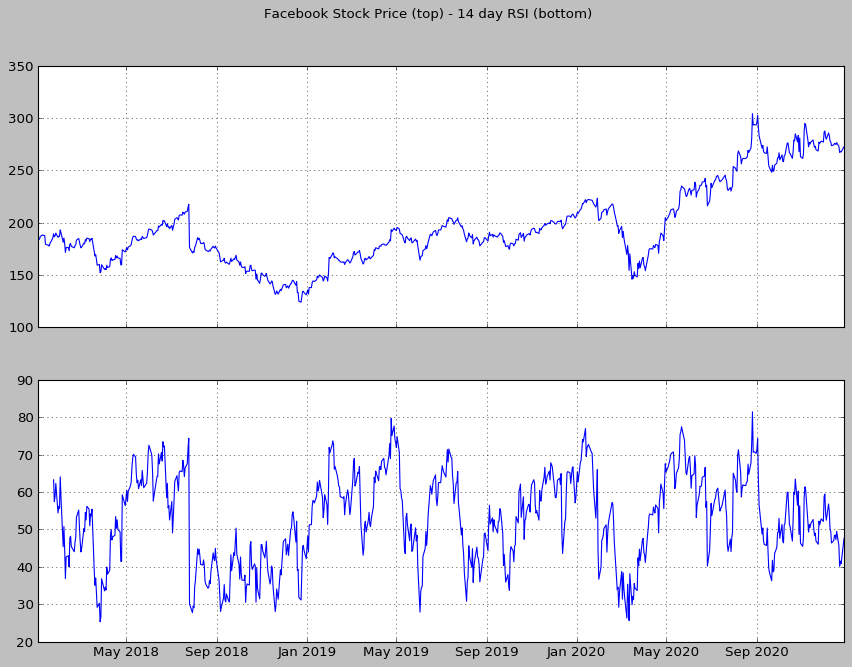

In [4]:
## Chart the stock price and RSI

plt.style.use('_classic_test')

fig, axs = plt.subplots(2, sharex=True, figsize=(13,9))
fig.suptitle('Facebook Stock Price (top) - 14 day RSI (bottom)')

axs[0].plot(df['Adj Close'])
axs[1].plot(df['RSI'])
axs[0].grid()
axs[1].grid()

In [5]:
## Calculate the buy & sell signals
## Initialize columns

df['Long Tomorrow'] = np.nan
df['Buy Signal'] = np.nan
df['Sell Signal'] = np.nan
df['Buy RSI'] = np.nan
df['Sell RSI'] = np.nan
df['Strategy'] = np.nan

#Calculate the buy & sell signals
for x in range(15, len(df)):
    
    #calculate "Long Tomorrow" column
    if ((df['RSI'][x] <= 40) & (df['RSI'][x-1]>40) ):
        df['Long Tomorrow'][x] = True
    elif ((df['Long Tomorrow'][x-1] == True) & (df['RSI'][x] <= 70)):
        df['Long Tomorrow'][x] = True
    else:
        df['Long Tomorrow'][x] = False
        
    #calculate "Buy Signal" column
    if ((df['Long Tomorrow'][x] == True) & (df['Long Tomorrow'][x-1] == False)):
        df['Buy Signal'][x] = df['Adj Close'][x]
        df['Buy RSI'][x] = df['RSI'][x]
        
    #calculate "Sell Signal" column
    if ((df['Long Tomorrow'][x] == False) & (df['Long Tomorrow'][x-1] == True)):
        df['Sell Signal'][x] = df['Adj Close'][x]
        df['Sell RSI'][x] = df['RSI'][x]
        
#calculate strategy performance
df['Strategy'][15] = df['Adj Close'][15]

for x in range(16, len(df)):
    if df['Long Tomorrow'][x-1] == True:
        df['Strategy'][x] = df['Strategy'][x-1]* (df['Adj Close'][x] / df['Adj Close'][x-1])
    else:
        df['Strategy'][x] = df['Strategy'][x-1]
        
print(df)

/opt/anaconda3/envs/scikit/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/scikit/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/anaconda3/envs/scikit/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/scikit/lib/pytho

                  High         Low        Open       Close    Volume  \
Date                                                                   
2018-01-02  181.580002  177.550003  177.679993  181.419998  18151900   
2018-01-03  184.779999  181.330002  181.880005  184.669998  16886600   
2018-01-04  186.210007  184.100006  184.899994  184.330002  13880900   
2018-01-05  186.899994  184.929993  185.589996  186.850006  13574500   
2018-01-08  188.899994  186.330002  187.199997  188.279999  17994700   
...                ...         ...         ...         ...       ...   
2020-12-21  274.670013  267.790009  272.980011  272.790009  16553700   
2020-12-22  271.500000  264.630005  271.500000  267.089996  17312900   
2020-12-23  272.170013  266.230011  266.890015  268.109985  14329000   
2020-12-24  270.399994  266.200012  268.880005  267.399994   6702000   
2020-12-28  273.049988  265.700012  268.739990  272.595001   8327437   

             Adj Close   Up Move  Down Move  Average Up  Averag

/opt/anaconda3/envs/scikit/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/scikit/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


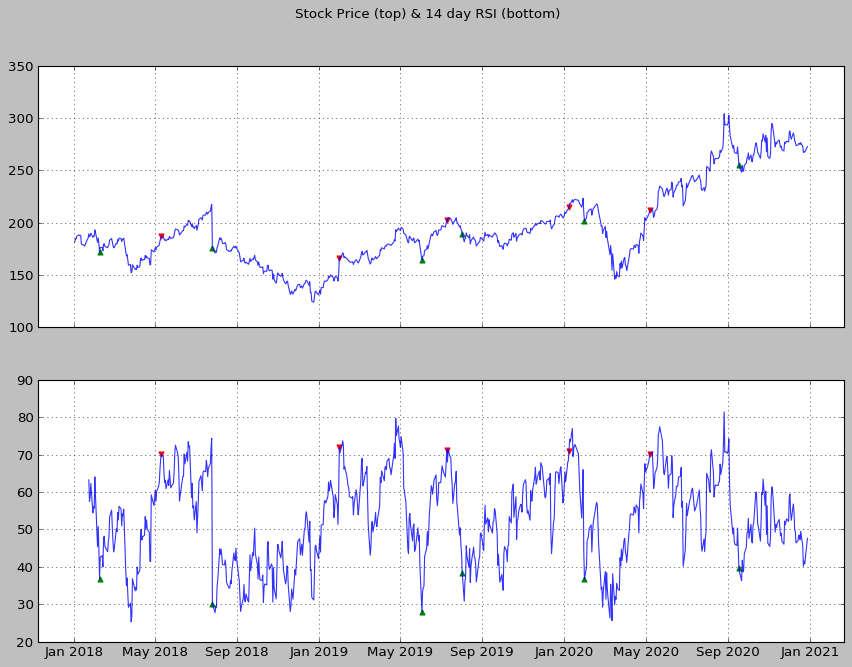

In [6]:
## Chart the buy/sell signals

plt.style.use('_classic_test')
fig, axs = plt.subplots(2, sharex=True, figsize=(13,9))
fig.suptitle('Stock Price (top) & 14 day RSI (bottom)')

## Chart the stock close price & buy/sell signals

axs[0].scatter(df.index, df['Buy Signal'],  color = 'green',  marker = '^', alpha = 1)
axs[0].scatter(df.index, df['Sell Signal'],  color = 'red',  marker = 'v', alpha = 1)
axs[0].plot(df['Adj Close'], alpha = 0.8)
axs[0].grid()

## Chart RSI & buy/sell signals

axs[1].scatter(df.index, df['Buy RSI'],  color = 'green', marker = '^', alpha = 1)
axs[1].scatter(df.index, df['Sell RSI'],  color = 'red', marker = 'v', alpha = 1)
axs[1].plot(df['RSI'], alpha = 0.8)
axs[1].grid()

In [7]:
## Calculate the MACD and Signal Line indicators
## Calculate the Short Term Exponential Moving Average

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() 

## Calculate the Long Term Exponential Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() 

## Calculate the Moving Average Convergence/Divergence (MACD)

MACD = ShortEMA - LongEMA

## Calcualte the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

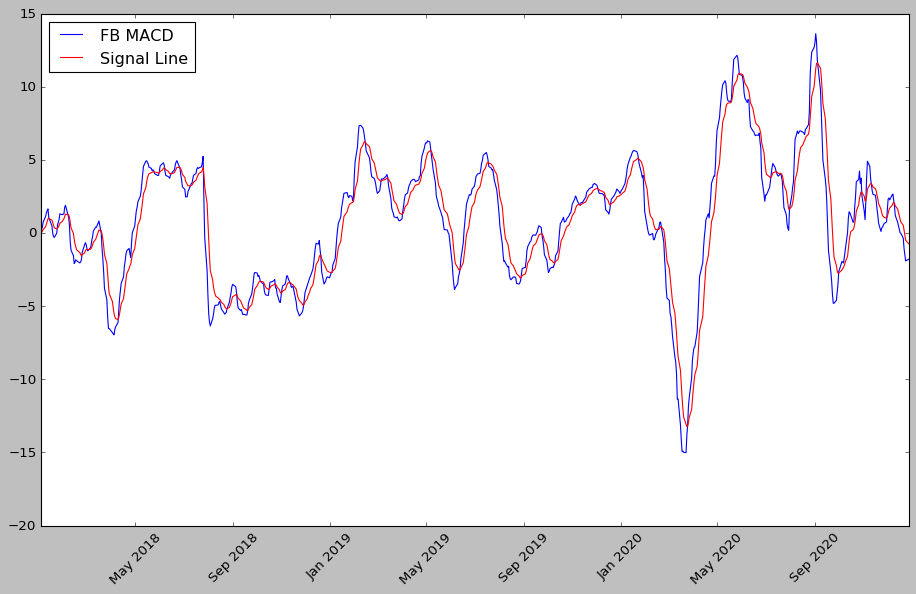

In [8]:
#Plot the chart

plt.figure(figsize=(14,8)) 
plt.style.use('classic')

plt.plot(df.index, MACD, label='FB MACD', color = 'blue')
plt.plot(df.index, signal, label='Signal Line', color='red')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()